In [194]:
import numpy as np
import pandas as pd
import matplotlib
import matplotlib.pyplot as plt

import statsmodels.api as sm
from statsmodels.api import OLS

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import PolynomialFeatures
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import Ridge
from sklearn.linear_model import RidgeCV
from sklearn.linear_model import LassoCV
from sklearn.linear_model import ElasticNetCV
from sklearn.metrics import r2_score

from pandas.plotting import scatter_matrix

In [148]:
# read data
df_raw = pd.read_csv('Hitters.csv')
# drop the index column
df_raw = df_raw.iloc[:,1:]
# drop NA
df_raw = df_raw.dropna()
# convert the categorical variables into binary
df = pd.get_dummies(df_raw, columns=['League', 'Division','NewLeague'], drop_first=True)

# get the train and test data
train_index = pd.read_csv('train_index.csv')
df = df.reset_index(drop=True)
train = df.iloc[train_index.values.reshape(1,-1)[0],:]
X_train = train.loc[:, train.columns != 'Salary']
y_train = train.Salary
test = df.drop(train_index.values.reshape(1,-1)[0], axis=0)
X_test = test.loc[:, train.columns != 'Salary']
y_test = test.Salary
X_all = df.loc[:, df.columns != 'Salary']
y_all = df.Salary

print(train.shape)
print(test.shape)

(132, 20)
(131, 20)


(263, 19)

In [133]:
# standardize X (except for binary data
def standardize(dataset):
    data = dataset.copy()
    non_binary_colnames = data.columns.difference(binary_columns)
    for i in non_binary_colnames:
        colname = i
        mu = X_train[colname].mean()
        sigma = X_train[colname].std()
        z_vector = (data[colname]-mu)/sigma
        data[colname] = z_vector   
    
    return data

binary_columns = ['League_N', 'Division_W', 'NewLeague_N']

X_train_scaled = standardize(X_train)

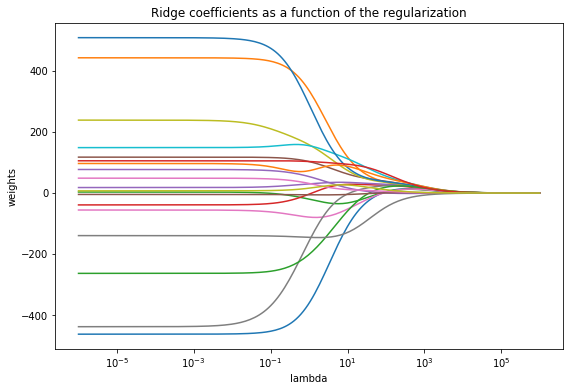

In [154]:

clf = Ridge()

coefs = []

alphas = np.logspace(-6, 6, 200)

# Train the model with different regularisation strengths
for a in alphas:
    clf.set_params(alpha=a)
    clf.fit(X_train_scaled, y_train)
    coefs.append(clf.coef_)

# Display results
plt.figure(figsize=(20, 6))

plt.subplot(121)
ax = plt.gca()
ax.plot(alphas, coefs)
ax.set_xscale('log')
plt.xlabel('lambda')
plt.ylabel('weights')
plt.title('Ridge coefficients as a function of the regularization')
plt.axis('tight')
plt.show()


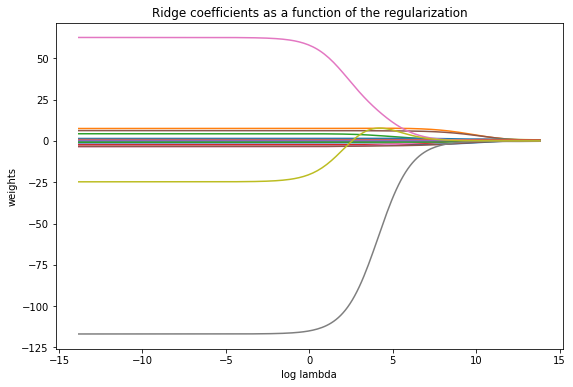

In [153]:
# without standardization

clf = Ridge()

coefs = []

alphas = np.logspace(-6, 6, 200)

# Train the model with different regularisation strengths
for a in alphas:
    clf.set_params(alpha=a)
    clf.fit(X_all, y_all)
    coefs.append(clf.coef_)

# Display results
plt.figure(figsize=(20, 6))

plt.subplot(121)
ax = plt.gca()
ax.plot(np.log(alphas), coefs)
plt.xlabel('log lambda')
plt.ylabel('weights')
plt.title('Ridge coefficients as a function of the regularization')
plt.axis('tight')
plt.show()


Computing regularization path using the lasso...
Computing regularization path using the positive lasso...
Computing regularization path using the elastic net...
Computing regularization path using the positive elastic net...


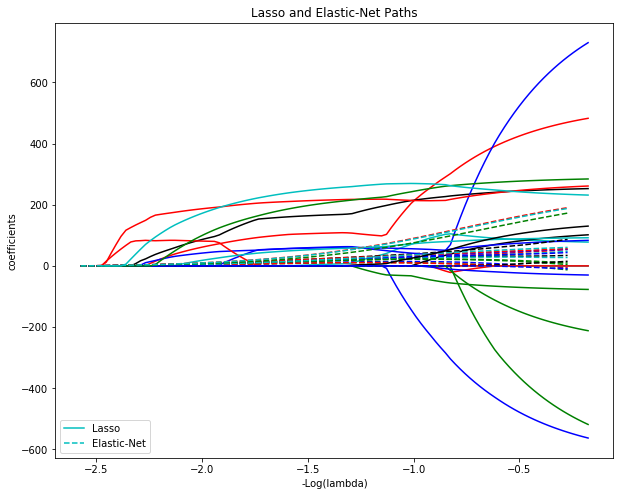

In [155]:
from itertools import cycle

from sklearn.linear_model import lasso_path, enet_path

eps = 5e-3  # the smaller it is the longer is the path

print("Computing regularization path using the lasso...")
alphas_lasso, coefs_lasso, _ = lasso_path(X_train_scaled, y_train, eps, fit_intercept=False)

print("Computing regularization path using the positive lasso...")
alphas_positive_lasso, coefs_positive_lasso, _ = lasso_path(
    X_train_scaled, y_train, eps, positive=True, fit_intercept=False)
print("Computing regularization path using the elastic net...")
alphas_enet, coefs_enet, _ = enet_path(
    X_train_scaled, y_train, eps=eps, l1_ratio=0.8, fit_intercept=False)

print("Computing regularization path using the positive elastic net...")
alphas_positive_enet, coefs_positive_enet, _ = enet_path(
    X_train_scaled, y_train, eps=eps, l1_ratio=0.8, positive=True, fit_intercept=False)

# Display results

fig = plt.figure(figsize=(10, 8)) 
plt.figure(1)
colors = cycle(['b', 'r', 'g', 'c', 'k'])
neg_log_alphas_lasso = -np.log10(alphas_lasso)
neg_log_alphas_enet = -np.log10(alphas_enet)
for coef_l, coef_e, c in zip(coefs_lasso, coefs_enet, colors):
    l1 = plt.plot(neg_log_alphas_lasso, coef_l, c=c)
    l2 = plt.plot(neg_log_alphas_enet, coef_e, linestyle='--', c=c)

    
 
plt.xlabel('-Log(lambda)')
plt.ylabel('coefficients')
plt.title('Lasso and Elastic-Net Paths')
plt.legend((l1[-1], l2[-1]), ('Lasso', 'Elastic-Net'), loc='lower left')
plt.axis('tight')
plt.show()

In [212]:
alphas = np.arange(0.1,100,0.1)
# fit OLS mdoel
OLS = LinearRegression().fit(X_train_scaled, y_train)

# fit Ridge model
Ridge= RidgeCV(alphas=alphas).fit(X_train_scaled, y_train)

# fit Lasso model
Lasso = LassoCV(alphas=alphas).fit(X_train_scaled, y_train)

# fit elastic net model
ElasticNet = ElasticNetCV(l1_ratio=0.01, alphas=alphas).fit(X_train_scaled, y_train)

C:\Users\Daiki\Anaconda3\lib\site-packages\sklearn\model_selection\_split.py:1978: FutureWarning: The default value of cv will change from 3 to 5 in version 0.22. Specify it explicitly to silence this warning.
  warnings.warn(CV_WARNING, FutureWarning)
C:\Users\Daiki\Anaconda3\lib\site-packages\sklearn\linear_model\coordinate_descent.py:471: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 22154.90090024937, tolerance: 2292.318653851472
  tol, rng, random, positive)
C:\Users\Daiki\Anaconda3\lib\site-packages\sklearn\linear_model\coordinate_descent.py:471: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 2137.3347740937024, tolerance: 2119.5252573233456
  tol, rng, random, positive)
C:\Users\Daiki\Anaconda3\lib\site-packages\sklearn\linear_model\coordinate_descent.py:471: ConvergenceWarning: Objective did not converge. You might want to increase the number of

In [216]:
print("Best Lambda")
print("Ridge :", Ridge.alpha_)
print("Lasso :", Lasso.alpha_)
print("Elastic Net :", ElasticNet.alpha_)

Best Lambda
Ridge : 75.1
Lasso : 29.500000000000004
Elastic Net : 0.6


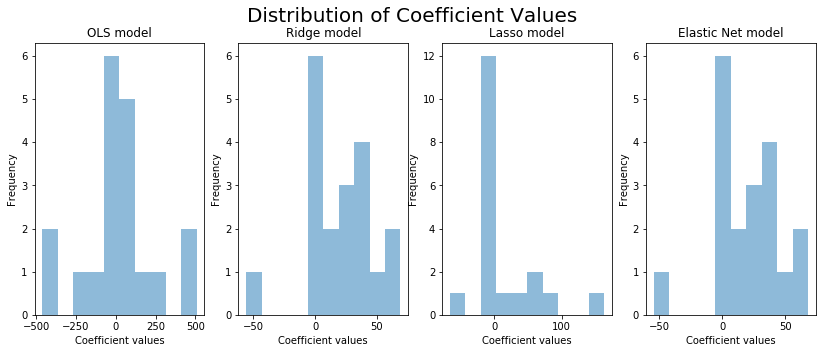

In [218]:
fig, ax = plt.subplots(figsize=(14,5), ncols=4)
ax = ax.ravel()
ax[0].hist(OLS.coef_.flatten(), bins=10, alpha=0.5) # excluding intercept
ax[0].set_xlabel('Coefficient values')
ax[0].set_ylabel('Frequency')
ax[0].set_title('OLS model')

ax[1].hist(Ridge.coef_.flatten(), bins=10, alpha=0.5)
ax[1].set_xlabel('Coefficient values')
ax[1].set_ylabel('Frequency')
ax[1].set_title('Ridge model')

ax[2].hist(Lasso.coef_.flatten(), bins=10, alpha=0.5)
ax[2].set_xlabel('Coefficient values')
ax[2].set_ylabel('Frequency')
ax[2].set_title('Lasso model')

ax[3].hist(ElasticNet.coef_.flatten(), bins=10, alpha=0.5)
ax[3].set_xlabel('Coefficient values')
ax[3].set_ylabel('Frequency')
ax[3].set_title('Elastic Net model')


plt.suptitle('Distribution of Coefficient Values', fontsize= 20)

plt.show()

Note:  
Coefficient values are inflated for the OLS model due to a large number of covariates and a relatively low number of observations.   
Coefficients for the Ridge model and Elastic Net model are almost identical as alpha (the ratio of Lasso regularization) is set as only 0.01.  
The lasso model has a lot of coefficient values of 0 as while coefficients for the Ridge and Elastic Net just have coefficinets around 0, not 0.




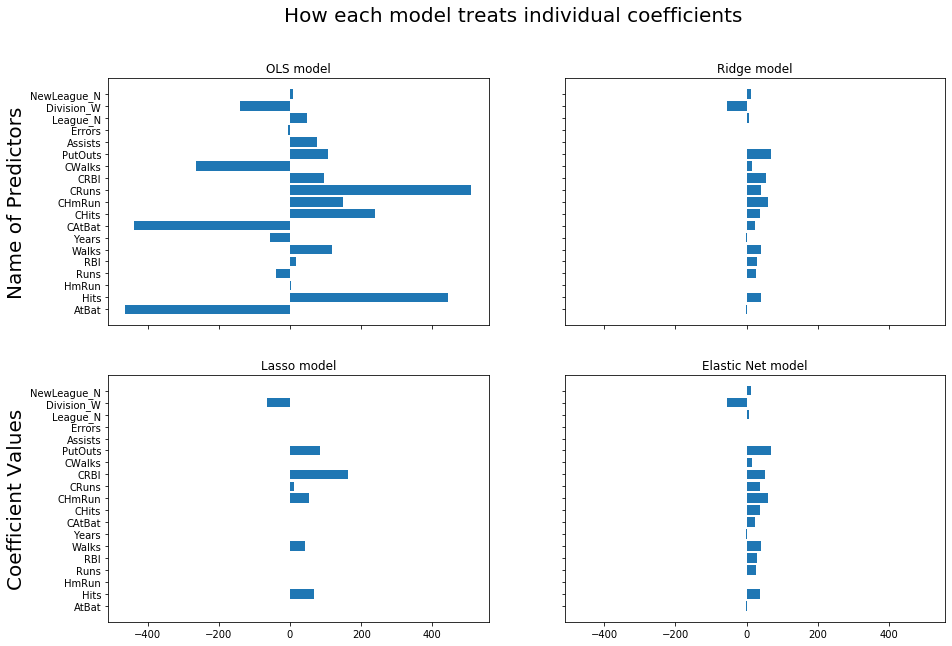

In [230]:
fig, ax = plt.subplots(figsize=(15,10), nrows= 2, ncols=2, sharex=True, sharey=True)

ax[0,0].barh(y = X_train.columns, width = OLS.coef_.flatten())
ax[0,0].set_title("OLS model")
ax[0,0].set_ylabel('Name of Predictors', fontsize=20)

ax[0,1].barh(y = X_train.columns, width = Ridge.coef_.flatten())
ax[0,1].set_title("Ridge model")

ax[1,0].barh(y = X_train.columns, width = Lasso.coef_.flatten())
ax[1,0].set_title("Lasso model")
ax[1,0].set_ylabel('Coefficient Values', fontsize=20)

ax[1,1].barh(y = X_train.columns, width = ElasticNet.coef_.flatten())
ax[1,1].set_title("Elastic Net model")

plt.suptitle('How each model treats individual coefficients', fontsize= 20)


plt.show()

From the above plots, you can see that most of variables have been nullfied by the lasso model.
This tells us which variables are important and which are not impotant.
Lasso is used for variable selection.